## Computational Data Analysis
Assignment 2

## Exploratory Data Analysis on Estonia Dataset

### TEAM MEMBERS:
<br>
Shikhar Srivastava (RA1911031010078)
    <br>
    Sambuddha Das (RA1911031010109)
    <br>
    Ritam Banerjee (RA1911031010114)

### About the dataset
**The sinking of the ferry vessel MS Estonia in the Baltic Sea is an accident that will haunt the maritime domain for long years and even beyond. Caused by myriad reasons, this Baltic Sea accident was an event so unprecedented that the extent of the damages caused, both to life and to property, is still shocking even after almost 15 years since the disaster occurred.The MS Estonia sinking occurred in the year 1994 in the month of September as the vessel was passing through the Baltic Sea from the Estonian province of Tallinn to her intended destination of Stockholm. At the time of the MS Estonia disaster nearly 1,000 people were aboard it, both voyagers and crewing personnel included and only a minuscule proportion of people were managed to be successfully saved from the wreckage of the unfortunate vessel.This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life the accidental blow-up of the explosives stored within the ferry’s confines. However several drawn-out analyses concluded that the vessel was merely a voyager ferry which had encountered an accidental catastrophe in the most unexpected of manner with emotionally debilitating repercussions.
In this challenge, we ask you to complete the analysis of what region people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.**


### Importing Libraries

In [95]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [96]:
data = pd.read_csv('./train.csv')

### Data Pre Processing

In [97]:
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [ ]:
data.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


In [ ]:
data.isnull().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

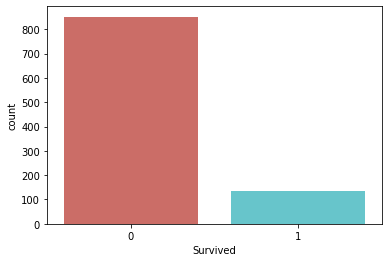

In [ ]:
data['Survived'].value_counts()
sns.countplot(x='Survived', data=data, palette='hls')

In [ ]:
count_nosur = len(data[data['Survived']==0])
count_sur = len(data[data['Survived']==1])
tot_psng = count_nosur+count_sur
pct_nosur = count_nosur/tot_psng
pct_sur = count_sur/tot_psng
print("Survivors = ", pct_sur*100)
print("No Survivors = ", pct_nosur*100)

Survivors =  13.852376137512639
No Survivors =  86.14762386248736


In [ ]:
#data.groupby('Survived').mean()
data.groupby('Sex'). mean()

,PassengerId,Age,Survived
Sex,,,
F,476.259259,45.518519,0.055556
M,513.093439,43.664016,0.218688


In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
F    0           459
     1            27
M    0           393
     1           110
Name: Survived, dtype: int64

### EDA (Exploratory Data Analysis)

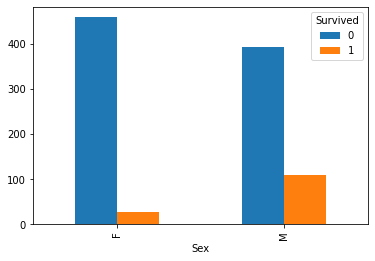

In [ ]:
pd.crosstab(data.Sex, data.Survived).plot(kind='bar')

In [ ]:
pd.crosstab(data.Category, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Category,,,
C,154,39,193
P,698,98,796
All,852,137,989


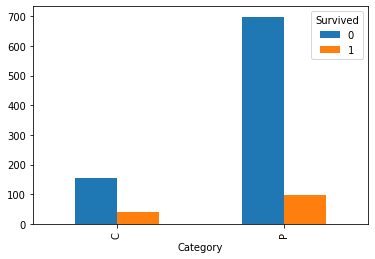

In [ ]:
pd.crosstab(data.Category, data.Survived).plot(kind='bar')

In [ ]:
pd.crosstab([data.Sex, data.Survived], data.Category, margins = True).style.background_gradient(cmap='summer_r')

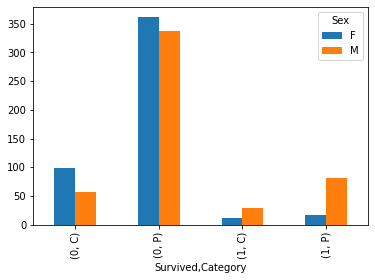

In [ ]:
pd.crosstab([data.Survived, data.Category], data.Sex).plot(kind='bar')

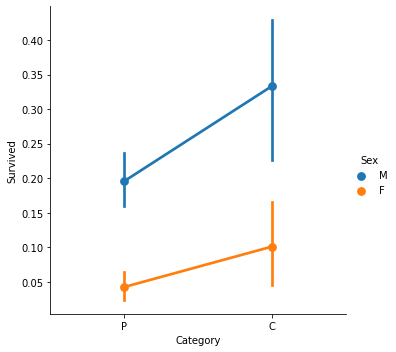

In [ ]:
sns.factorplot('Category', 'Survived', hue='Sex', data=data)

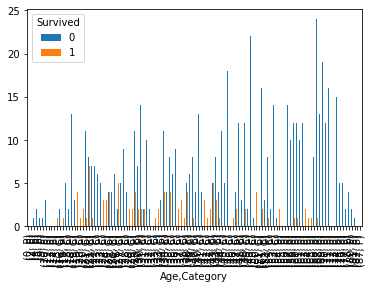

In [ ]:
pd.crosstab([data.Age, data.Category], data.Survived).plot(kind='bar')

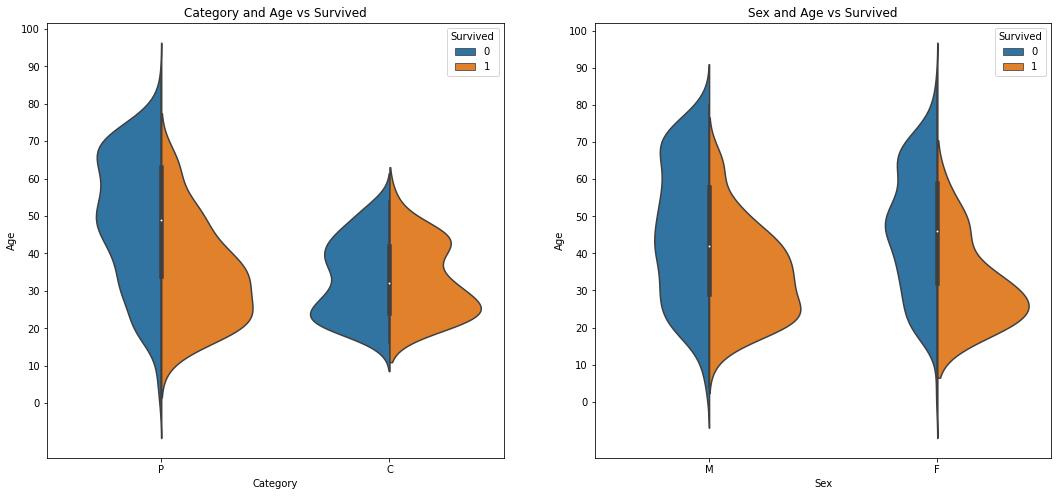

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Category","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Category and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

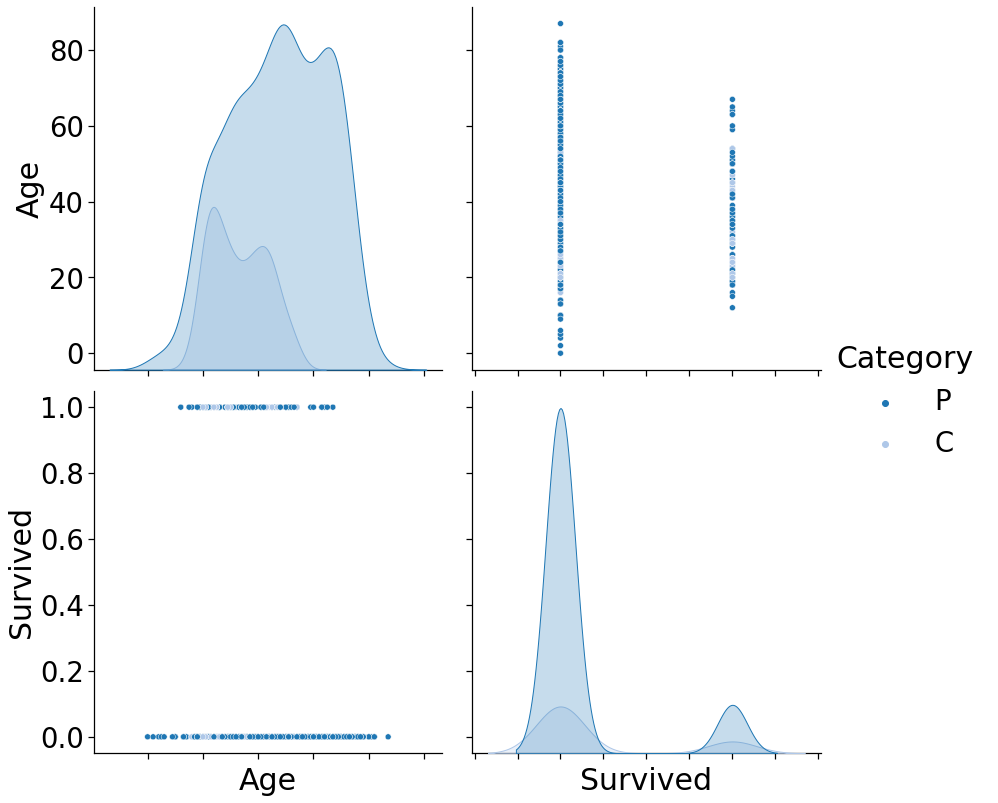

In [ ]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(data[['Age','Survived','Category','Sex']], 
                 hue='Category', palette='tab20',size=6)
g.set(xticklabels=[]);

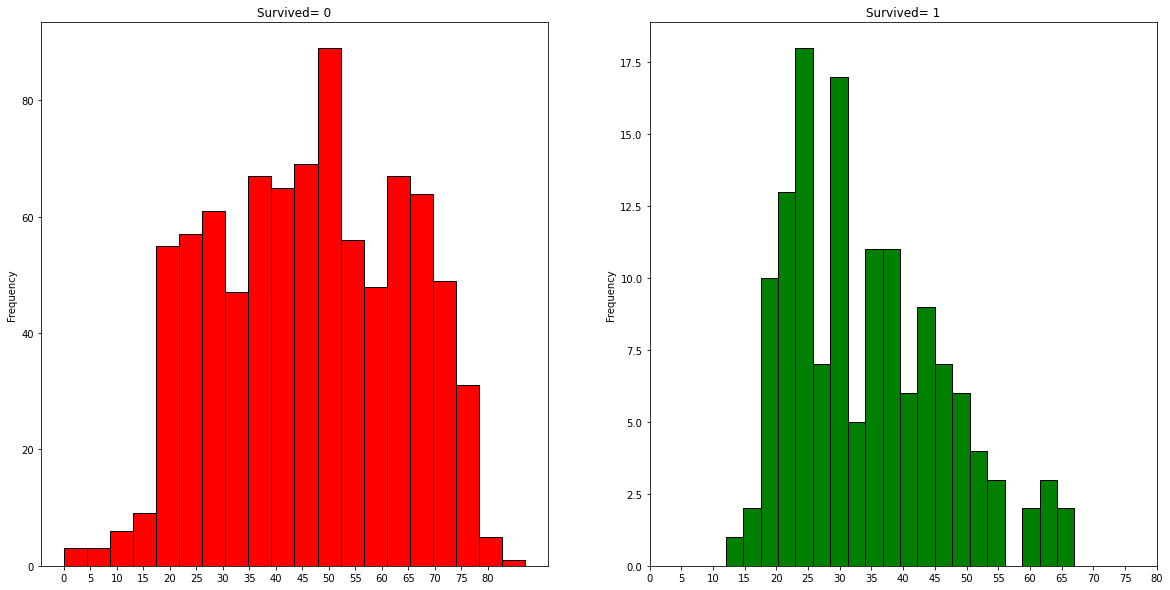

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

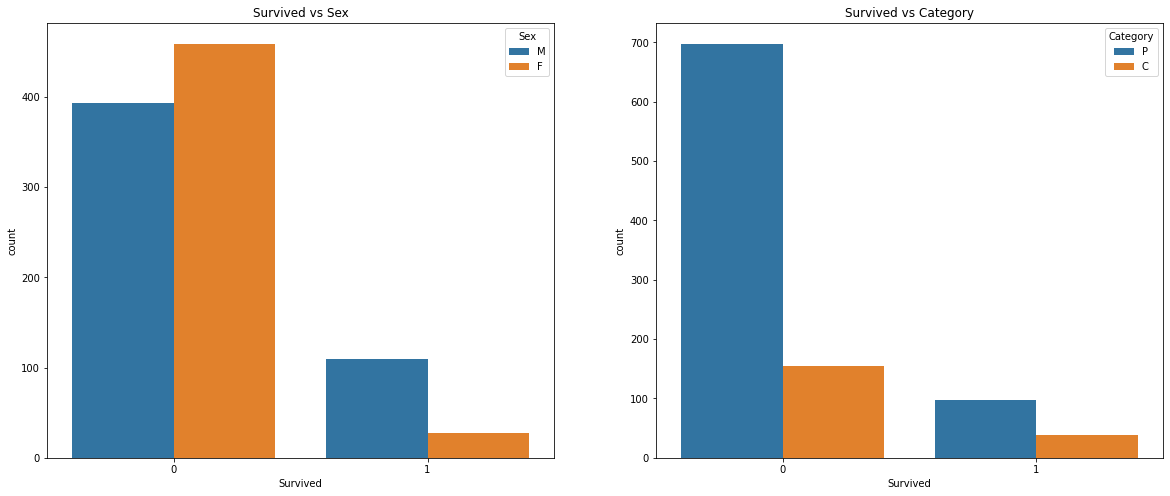

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot('Survived',hue='Sex',data=data,ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Survived',hue='Category',data=data,ax=ax[1])
ax[1].set_title('Survived vs Category')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

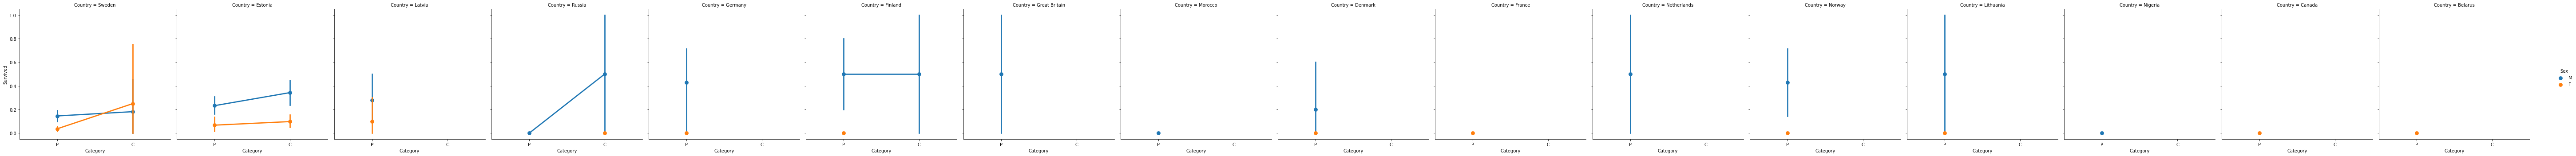

In [ ]:
sns.factorplot('Category', 'Survived', hue='Sex', col='Country', data=data)

In [ ]:
data['Country'].fillna('S', inplace=True)

In [ ]:
data.Country.isnull().any()

False

In [ ]:
data.isnull().sum()

PassengerId      0
Country          0
Firstname        0
Lastname         0
Sex              0
Age              0
Category         0
Survived         0
Initial        989
dtype: int64

In [ ]:
pd.crosstab([data.Country,data.Sex],[data.Survived, data.Category]).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(data.Country,data.Category).style.background_gradient(cmap='summer_r')

Category,C,P
Country,,
Belarus,0,1
Canada,0,1
Denmark,0,6
Estonia,169,175
Finland,2,14
France,0,1
Germany,0,8
Great Britain,0,2
Latvia,0,28


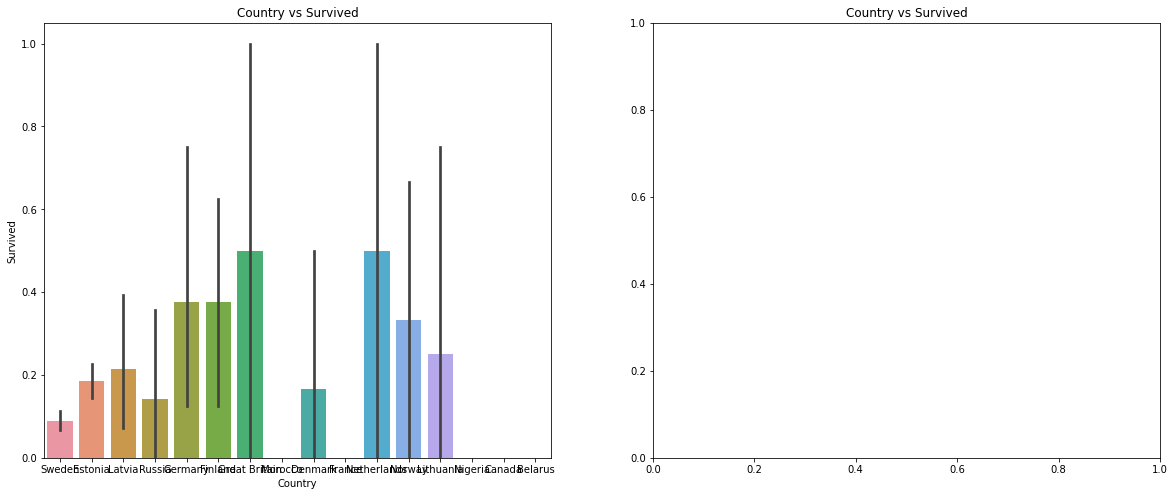

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Country','Survived',data=data,ax=ax[0])
ax[0].set_title('Country vs Survived')
sns.factorplot('Country','Survived',data=data,ax=ax[1])
ax[1].set_title('Country vs Survived')
plt.close(2)
plt.show()


In [ ]:
print("Highest age was: ", data['Age'].max())
print("Lowest age was: ", data['Age'].min())
print("Average age was: ", data['Age'].mean())

Highest age was:  87
Lowest age was:  0
Average age was:  44.575328614762384


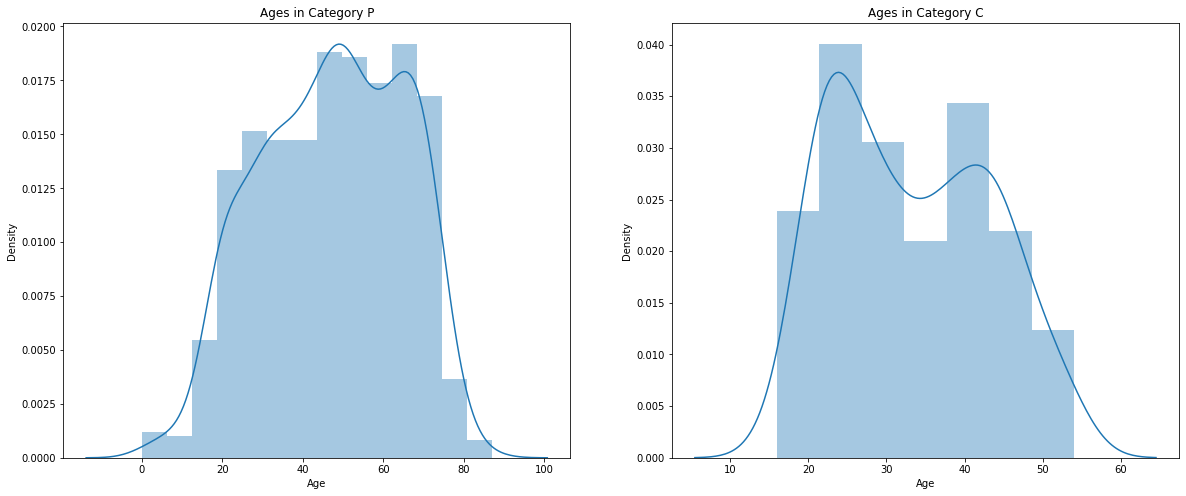

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(data[data['Category']=='P'].Age,ax=ax[0])
ax[0].set_title('Ages in Category P')
sns.distplot(data[data['Category']=='C'].Age,ax=ax[1])
ax[1].set_title('Ages in Category C')
plt.show()

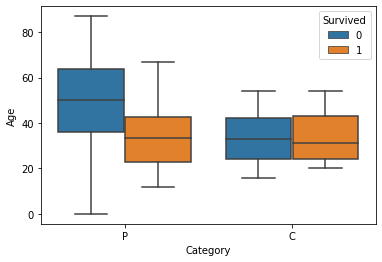

In [ ]:
sns.boxplot(x='Category', y='Age', hue='Survived',data=data)

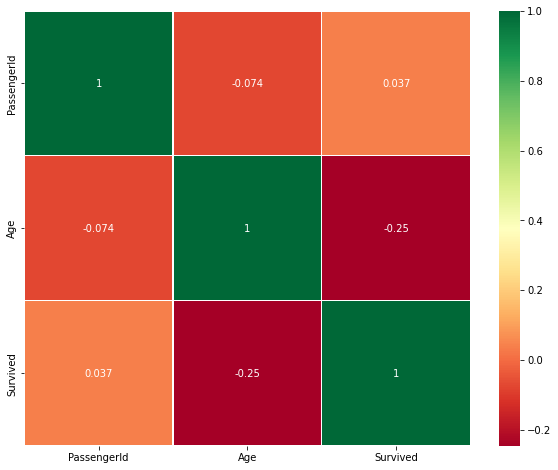

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

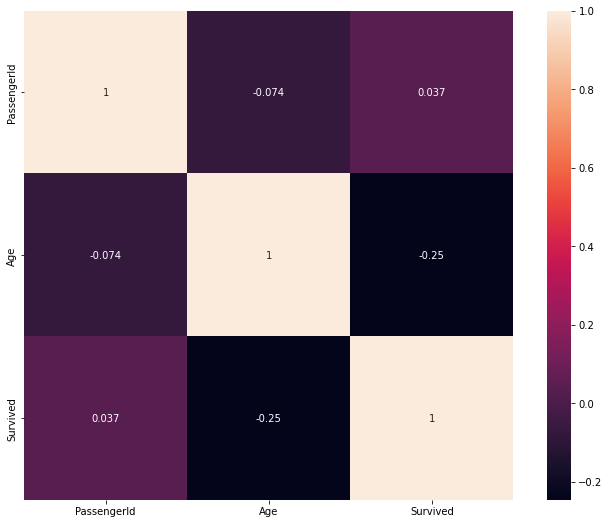

In [ ]:
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(), annot=True, square=True)

In [98]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age_band
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0,3
1,2,Estonia,LEA,AALISTE,F,22,C,0,1


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
2,289
1,268
3,249
4,164
0,19


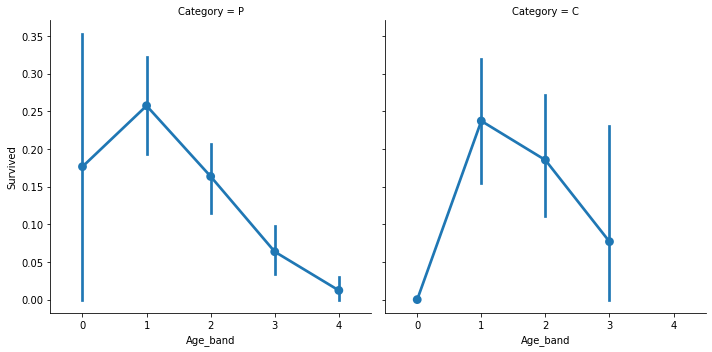

In [ ]:
sns.factorplot('Age_band','Survived',data=data,col='Category')

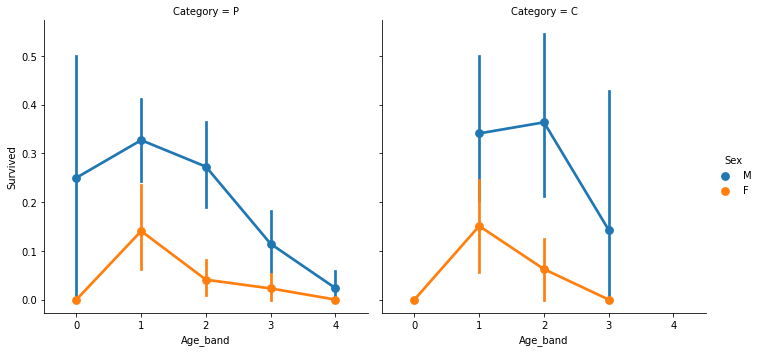

In [ ]:
sns.factorplot('Age_band','Survived',data=data,hue='Sex',col='Category')
plt.show()

In [ ]:
data['Age_band']=pd.qcut(data['Age'],4)
data.groupby(['Age_band'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Age_band,
"(-0.001, 30.0]",0.239216
"(30.0, 44.0]",0.201646
"(44.0, 59.0]",0.082031
"(59.0, 87.0]",0.025532


In [124]:
data['Sex'].replace(['M','F'],[0,1],inplace=True)
data['Category'].replace(['P','C'],[0,1],inplace=True)
data['Country'].replace(['Sweden','Estonia','Latvia','Russia','Germany','Finland','Great Britain','Morocco','Denmark','France','Netherlands','Norway','Lithuania','Nigeria','Canada','Belarus'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],inplace=True)

In [107]:
data.drop(['Firstname','Lastname','Age','PassengerId'],axis=1,inplace=True)

KeyError: ignored

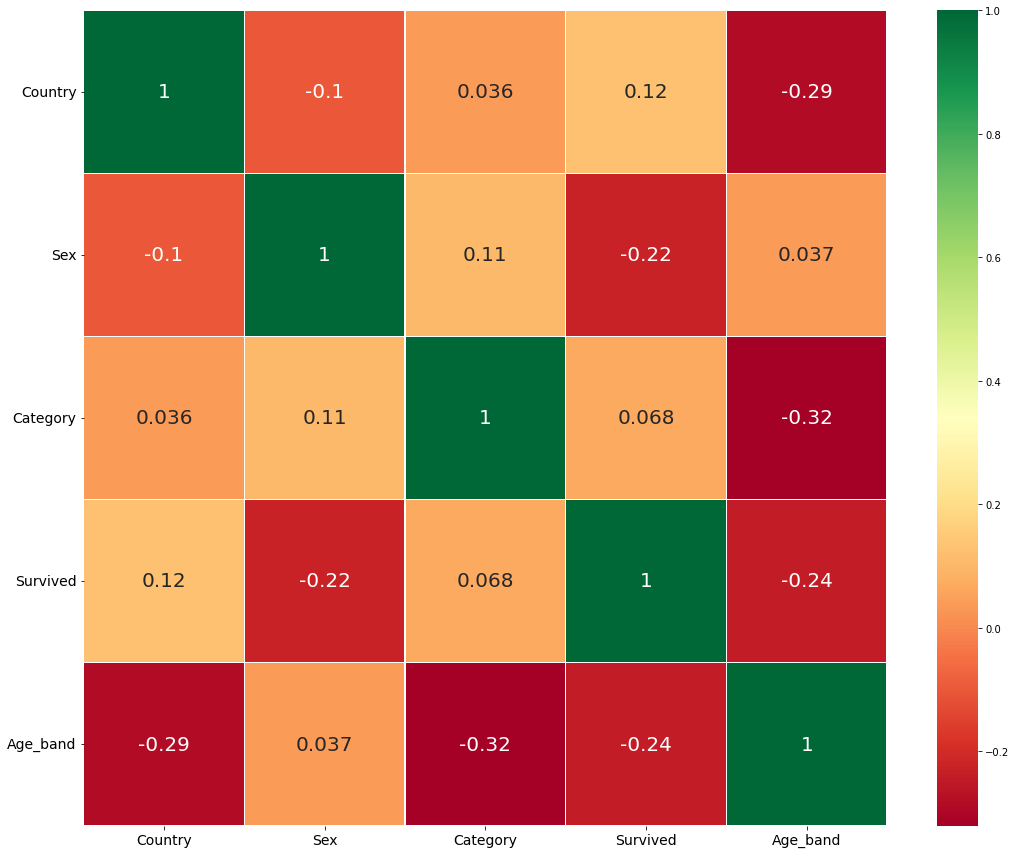

In [125]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Model Training

In [121]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [126]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [128]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test1_Y))

Accuracy for rbf SVM is  0.7333333333333333


In [129]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.7333333333333333


In [130]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7333333333333333


In [131]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.7377777777777778


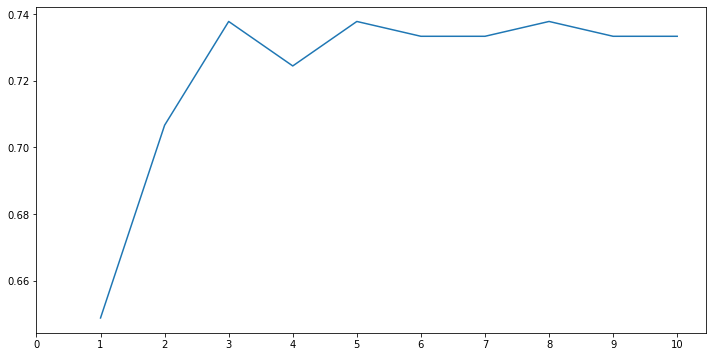

Accuracies for different values of n are: [0.64888889 0.70666667 0.73777778 0.72444444 0.73777778 0.73333333
 0.73333333 0.73777778 0.73333333 0.73333333] 
with the max value as  0.7377777777777778


In [132]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in a_index:
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'\nwith the max value as ',a.values.max())